In [ ]:
'''
# Automobile MPG Analysis Report

This report aims to investigate the impact of various automobile engine factors on the vehicle's MPG.
The dataset 'auto-mpg.csv' contains information on cylinders, displacement, horsepower, weight, etc.

### Dataset Modifications
- Replaced '?' values with NaN.
- Dropped rows with missing values.

### Exploratory Data Analysis
- Visualized the relationship between horsepower and MPG using scatter plots.
- Conducted linear regression analysis to understand the correlation between independent variables and MPG.

'''

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
data = pd.read_csv('auto-mpg(1).csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

    mpg  cylinder  displacement horsepower  weight  acceleration  model year  \
0  18.0         8         307.0        130    3504          12.0          70   
1  15.0         8         350.0        165    3693          11.5          70   
2  18.0         8         318.0        150    3436          11.0          70   
3  16.0         8         304.0        150    3433          12.0          70   
4  17.0         8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [17]:
import pandas as pd

# Load the dataset, replacing '?' with NaN
data = pd.read_csv('auto-mpg(1).csv', na_values='?')

# Drop rows with NaN values
data = data.dropna()

# Rest of your code for visualization and regression...


In [18]:
print(data)

      mpg  cylinder  displacement  horsepower  weight  acceleration  \
0    18.0         8         307.0       130.0    3504          12.0   
1    15.0         8         350.0       165.0    3693          11.5   
2    18.0         8         318.0       150.0    3436          11.0   
3    16.0         8         304.0       150.0    3433          12.0   
4    17.0         8         302.0       140.0    3449          10.5   
..    ...       ...           ...         ...     ...           ...   
393  27.0         4         140.0        86.0    2790          15.6   
394  44.0         4          97.0        52.0    2130          24.6   
395  32.0         4         135.0        84.0    2295          11.6   
396  28.0         4         120.0        79.0    2625          18.6   
397  31.0         4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

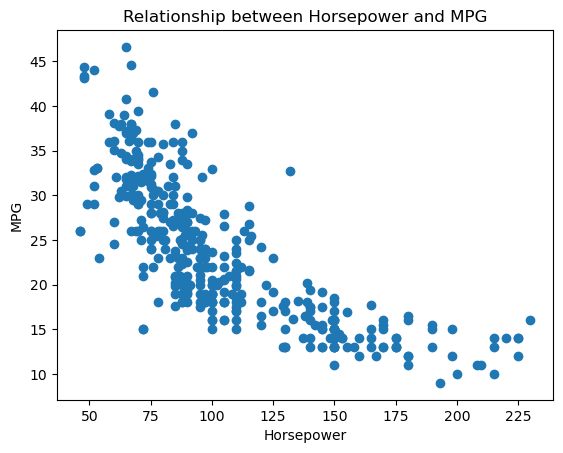

Correlation between Horsepower and MPG: -0.7784267838977761


In [41]:
# Create visual plots and charts
# For example, a scatter plot between 'mpg' and 'horsepower'
plt.scatter(data['horsepower'], data['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between Horsepower and MPG')
plt.show()

# Calculate the correlation between 'horsepower' and 'MPG'
correlation = data['horsepower'].corr(data['mpg'])
print('Correlation between Horsepower and MPG:', correlation)


In [20]:
# Simple Linear Regression with the first 300 samples
X = data[['horsepower']][:300]  # Using 'horsepower' as the independent variable
y = data['mpg'][:300]

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting on test set
y_pred = model.predict(X_test)

In [24]:
# Calculating metrics for simple linear regression
print('Simple Linear Regression Metrics:')
print('R-squared:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Simple Linear Regression Metrics:
R-squared: 0.6109374374583166
Mean Absolute Error: 3.024471970571497
Mean Squared Error: 13.611997865207668
Root Mean Squared Error: 3.689444113305915


In [25]:
# Multiple Linear Regression with the first 300 samples
X_multiple = data[['horsepower', 'displacement', 'weight']][:300]  # Using multiple variables
y_multiple = data['mpg'][:300]

In [26]:
# Splitting the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

In [27]:
# Fitting the multiple linear regression model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predicting on test set for multiple linear regression
y_pred_multi = model_multi.predict(X_test_multi)

# Calculating metrics for multiple linear regression
print('Multiple Linear Regression Metrics:')
print('R-squared:', metrics.r2_score(y_test_multi, y_pred_multi))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_multi, y_pred_multi))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_multi, y_pred_multi))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test_multi, y_pred_multi, squared=False))

Multiple Linear Regression Metrics:
R-squared: 0.7621877618007239
Mean Absolute Error: 2.3143022652126324
Mean Squared Error: 8.320254864773805
Root Mean Squared Error: 2.884485199264126


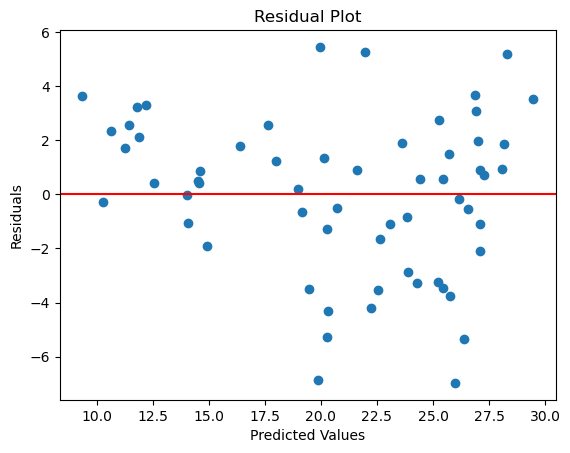

In [29]:
# Residual Plot for the best model using all data
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()


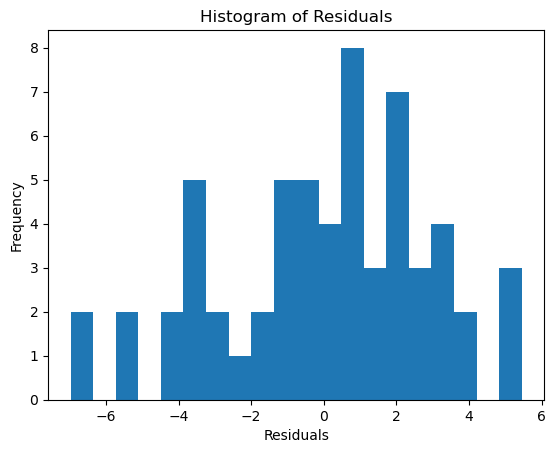

In [31]:
# Histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [32]:
# Using the best model to predict the remaining 98 samples
X_remaining = data[['horsepower', 'displacement', 'weight']][300:]  # Using the same variables
y_remaining = data['mpg'][300:]

In [33]:
# Predicting on remaining data
y_pred_remaining = model_multi.predict(X_remaining)

In [34]:
# Comparing predictions to actual reported mpg
comparison = pd.DataFrame({'Actual MPG': y_remaining, 'Predicted MPG': y_pred_remaining})
print('Predictions compared to actual reported MPG:')
print(comparison)

Predictions compared to actual reported MPG:
     Actual MPG  Predicted MPG
302        34.5      27.219903
303        31.8      28.070557
304        37.3      27.401804
305        28.4      23.957287
306        28.8      23.578440
..          ...            ...
393        27.0      23.519391
394        44.0      27.823067
395        32.0      26.018456
396        28.0      24.594048
397        31.0      24.053867

[92 rows x 2 columns]
